In [1]:
%matplotlib inline


# Image tutorial


A short tutorial on plotting images with Matplotlib.


Startup commands
===================

First, let's start IPython.  It is a most excellent enhancement to the
standard Python prompt, and it ties in especially well with
Matplotlib.  Start IPython either at a shell, or the IPython Notebook now.

With IPython started, we now need to connect to a GUI event loop.  This
tells IPython where (and how) to display plots.  To connect to a GUI
loop, execute the **%matplotlib** magic at your IPython prompt.  There's more
detail on exactly what this does at `IPython's documentation on GUI
event loops
<http://ipython.org/ipython-doc/2/interactive/reference.html#gui-event-loop-support>`_.

If you're using IPython Notebook, the same commands are available, but
people commonly use a specific argument to the %matplotlib magic:

.. sourcecode:: ipython

    In [1]: %matplotlib inline

This turns on inline plotting, where plot graphics will appear in your
notebook.  This has important implications for interactivity.  For inline plotting, commands in
cells below the cell that outputs a plot will not affect the plot.  For example,
changing the color map is not possible from cells below the cell that creates a plot.
However, for other backends, such as Qt5, that open a separate window,
cells below those that create the plot will change the plot - it is a
live object in memory.

This tutorial will use matplotlib's imperative-style plotting
interface, pyplot.  This interface maintains global state, and is very
useful for quickly and easily experimenting with various plot
settings.  The alternative is the object-oriented interface, which is also
very powerful, and generally more suitable for large application
development.  If you'd like to learn about the object-oriented
interface, a great place to start is our :doc:`Usage guide
</tutorials/introductory/usage>`.  For now, let's get on
with the imperative-style approach:


para ler 
https://matplotlib.org/3.1.1/tutorials/introductory/images.html

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Importing image data into Numpy arrays
===============================================

Loading image data is supported by the `Pillow
<https://pillow.readthedocs.io/en/latest/>`_ library.  Natively, Matplotlib
only supports PNG images.  The commands shown below fall back on Pillow if
the native read fails.

The image used in this example is a PNG file, but keep that Pillow
requirement in mind for your own data.

Here's the image we're going to play with:

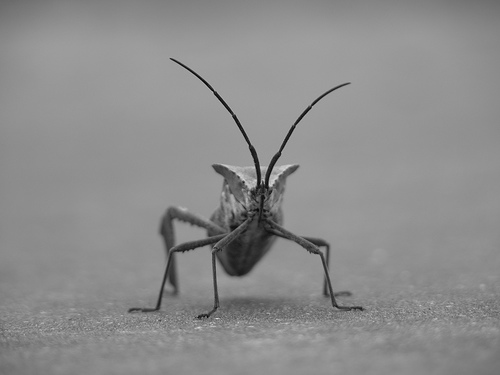


It's a 24-bit RGB PNG image (8 bits for each of R, G, B).  Depending
on where you get your data, the other kinds of image that you'll most
likely encounter are RGBA images, which allow for transparency, or
single-channel grayscale (luminosity) images.  You can right click on
it and choose "Save image as" to download it to your computer for the
rest of this tutorial.

And here we go...



In [6]:
img = mpimg.imread('img/stinkbug.png')
print(img)

[[[0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  [0.40784314 0.40784314 0.40784314]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  [0.4117647  0.4117647  0.4117647 ]
  ...
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]
  [0.42745098 0.42745098 0.42745098]]

 [[0.41960785 0.41960785 0.41960785]
  [0.41568628 0.41568628 0.41568628]
  [0.41568628 0.41568628 0.41568628]
  ...
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]
  [0.43137255 0.43137255 0.43137255]]

 ...

 [[0.4392157  0.4392157  0.4392157 ]
  [0.43529412 0.43529412 0.43529412]
  [0.43137255 0.43137255 0.43137255]
  ...
  [0.45490196 0.45490196 0.45490196]
  [0.4509804  0.4509804  0.4509804 ]
  [0.4509804  0.4509804  0.4509804 ]]

 [[0.44313726 0.44313726 0.44313726]
  [0.44313726 0.44313726 0.44313726]


Note the dtype there - float32.  Matplotlib has rescaled the 8 bit
data from each channel to floating point data between 0.0 and 1.0.  As
a side note, the only datatype that Pillow can work with is uint8.
Matplotlib plotting can handle float32 and uint8, but image
reading/writing for any format other than PNG is limited to uint8
data.  Why 8 bits? Most displays can only render 8 bits per channel
worth of color gradation.  Why can they only render 8 bits/channel?
Because that's about all the human eye can see.  More here (from a
photography standpoint): `Luminous Landscape bit depth tutorial
<https://luminous-landscape.com/bit-depth/>`_.

Each inner list represents a pixel.  Here, with an RGB image, there
are 3 values.  Since it's a black and white image, R, G, and B are all
similar.  An RGBA (where A is alpha, or transparency), has 4 values
per inner list, and a simple luminance image just has one value (and
is thus only a 2-D array, not a 3-D array).  For RGB and RGBA images,
matplotlib supports float32 and uint8 data types.  For grayscale,
matplotlib supports only float32.  If your array data does not meet
one of these descriptions, you need to rescale it.


Plotting numpy arrays as images
===================================

So, you have your data in a numpy array (either by importing it, or by
generating it).  Let's render it.  In Matplotlib, this is performed
using the :func:`~matplotlib.pyplot.imshow` function.  Here we'll grab
the plot object.  This object gives you an easy way to manipulate the
plot from the prompt.



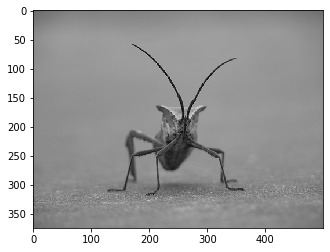

In [7]:
imgplot = plt.imshow(img)

You can also plot any numpy array.


Applying pseudocolor schemes to image plots
-------------------------------------------------

Pseudocolor can be a useful tool for enhancing contrast and
visualizing your data more easily.  This is especially useful when
making presentations of your data using projectors - their contrast is
typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity
images.  We currently have an RGB image.  Since R, G, and B are all
similar (see for yourself above or in your data), we can just pick one
channel of our data:



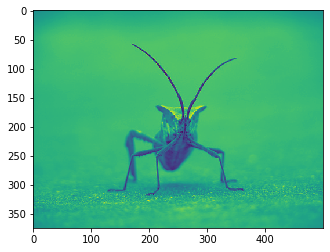

In [8]:
lum_img = img[:, :, 0]

# This is array slicing.  You can read more in the `Numpy tutorial
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.

plt.imshow(lum_img)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table,
LUT), is applied.  The default is called viridis.  There are plenty of
others to choose from.



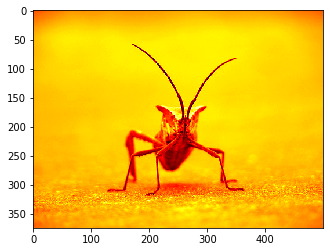

In [9]:
plt.imshow(lum_img, cmap="hot")

Note that you can also change colormaps on existing plot objects using the
:meth:`~matplotlib.image.Image.set_cmap` method:



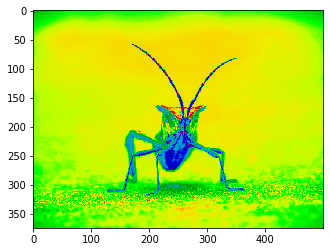

In [10]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

<div class="alert alert-info"><h4>Note</h4><p>However, remember that in the IPython notebook with the inline backend,
   you can't make changes to plots that have already been rendered.  If you
   create imgplot here in one cell, you cannot call set_cmap() on it in a later
   cell and expect the earlier plot to change.  Make sure that you enter these
   commands together in one cell.  plt commands will not change plots from earlier
   cells.</p></div>

There are many other colormap schemes available.  See the `list and
images of the colormaps
<../colors/colormaps.html>`_.


Color scale reference
------------------------

It's helpful to have an idea of what value a color represents.  We can
do that by adding color bars.



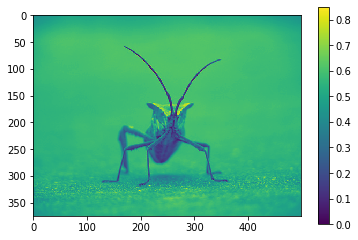

In [11]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

This adds a colorbar to your existing figure.  This won't
automatically change if you change you switch to a different
colormap - you have to re-create your plot, and add in the colorbar
again.


Examining a specific data range
---------------------------------

Sometimes you want to enhance the contrast in your image, or expand
the contrast in a particular region while sacrificing the detail in
colors that don't vary much, or don't matter.  A good tool to find
interesting regions is the histogram.  To create a histogram of our
image data, we use the :func:`~matplotlib.pyplot.hist` function.



(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

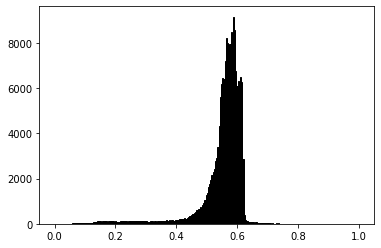

In [12]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

Most often, the "interesting" part of the image is around the peak,
and you can get extra contrast by clipping the regions above and/or
below the peak.  In our histogram, it looks like there's not much
useful information in the high end (not many white things in the
image).  Let's adjust the upper limit, so that we effectively "zoom in
on" part of the histogram.  We do this by passing the clim argument to
imshow.  You could also do this by calling the
:meth:`~matplotlib.image.Image.set_clim` method of the image plot
object, but make sure that you do so in the same cell as your plot
command when working with the IPython Notebook - it will not change
plots from earlier cells.

You can specify the clim in the call to ``plot``.



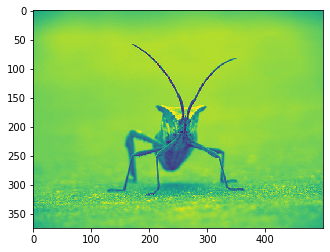

In [13]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

You can also specify the clim using the returned object



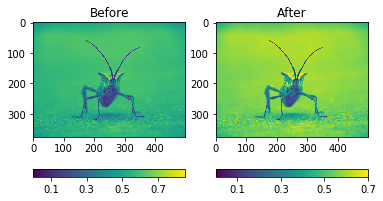

In [14]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')


Array Interpolation schemes
---------------------------

Interpolation calculates what the color or value of a pixel "should"
be, according to different mathematical schemes.  One common place
that this happens is when you resize an image.  The number of pixels
change, but you want the same information.  Since pixels are discrete,
there's missing space.  Interpolation is how you fill that space.
This is why your images sometimes come out looking pixelated when you
blow them up.  The effect is more pronounced when the difference
between the original image and the expanded image is greater.  Let's
take our image and shrink it.  We're effectively discarding pixels,
only keeping a select few.  Now when we plot it, that data gets blown
up to the size on your screen.  The old pixels aren't there anymore,
and the computer has to draw in pixels to fill that space.

We'll use the Pillow library that we used to load the image also to resize
the image.



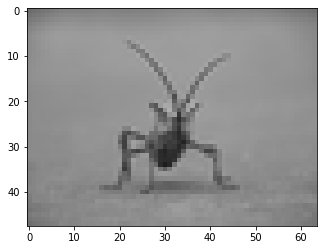

In [16]:
from PIL import Image

img = Image.open('img/stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img)

Here we have the default interpolation, bilinear, since we did not
give :func:`~matplotlib.pyplot.imshow` any interpolation argument.

Let's try some others. Here's "nearest", which does no interpolation.



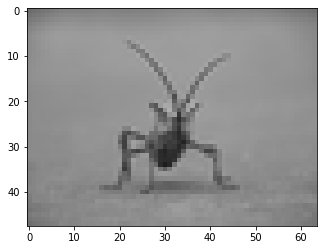

In [17]:
imgplot = plt.imshow(img, interpolation="nearest")

and bicubic:



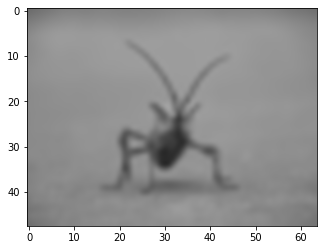

In [18]:
imgplot = plt.imshow(img, interpolation="bicubic")

Bicubic interpolation is often used when blowing up photos - people
tend to prefer blurry over pixelated.

